In [1]:
%matplotlib inline
#import 套件
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [7]:
from keras.datasets import fashion_mnist

ModuleNotFoundError: No module named 'keras'

## 讀入Fashion MNSIT數據集

In [3]:
fashion_mnist='fashion_mnist'

In [4]:
(x_train, y_train), (x_test, y_test)=fashion_mnist.load_data()

AttributeError: 'str' object has no attribute 'load_data'

In [56]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [57]:
len(x_train)

60000

## 看數據集內容

In [58]:
len(x_test)

10000

In [59]:
n=12345

In [60]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   5, 118, 107,   3,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0],
       [  0, 175, 197, 204, 212, 144, 104, 119, 120, 105,  79,  69,  60,
         49,  44,  40,  37,  33,  36,  34,  23,  14,  12,  27,  41,   0,
          0,   1],
       [  0, 204, 195, 199, 196, 198, 209, 209, 207, 206, 204, 202, 197,
        193, 193, 197, 198, 197, 206, 205, 199, 190, 195, 197, 205,  48,
          0,   0],
       [ 2

In [61]:
y_train[n]

8

This is Bag


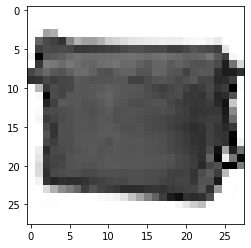

In [62]:
print("This is",class_names[y_train[n]])
plt.imshow(x_train[n],cmap="Greys")

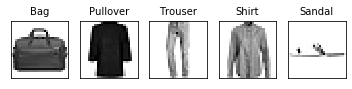

In [63]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n],cmap="Greys")  

In [64]:
x_train = x_train/255

In [65]:
x_test = x_test/255

In [66]:
x_train = x_train.reshape(60000,784)

In [67]:
y_train.shape

(60000,)

In [68]:
x_test = x_test.reshape(10000,784)

In [69]:
from tensorflow.keras.utils import to_categorical

In [70]:
y_train = to_categorical(y_train,10)

In [71]:
y_test = to_categorical(y_test,10)

In [72]:
y_train[12345]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

## 打造神經網路

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [82]:
model = Sequential()
model.add(Dense(100, input_dim=784, activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='mse', optimizer=SGD(lr=0.09), metrics=['accuracy'])

In [88]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


## 訓練

In [89]:
model.fit(x_train,y_train, batch_size=20, epochs=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0181 - accuracy: 0.8781
Epoch 2/50
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0178 - accuracy: 0.8810
Epoch 3/50
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0174 - accuracy: 0.8839
Epoch 4/50
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0171 - accuracy: 0.8858
Epoch 5/50
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0168 - accuracy: 0.8880
Epoch 6/50
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0166 - accuracy: 0.8890
Epoch 7/50
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0164 - accuracy: 0.8899
Epoch 8/50
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0162 - accuracy: 0.8932
Epoch 9/50
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0159 - accuracy: 0.8941s
Epoch 10/50
6

In [101]:
result=model.predict_classes(x_test)

In [109]:
def show(a):
    print("神經網路預測是",class_names[result[a]])
    plt.imshow(x_test[a].reshape(28,28),cmap="Greys")

神經網路預測是 Shirt


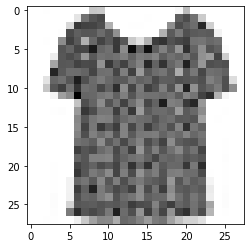

In [110]:
show(1000)

神經網路預測是 T-shirt/top


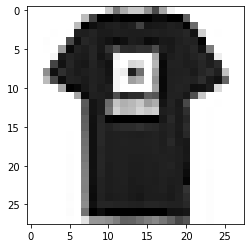

In [111]:
show(121)

神經網路預測是 Sandal


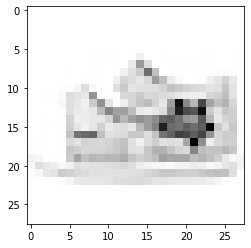

In [113]:
show(9999)

神經網路預測是 Ankle boot


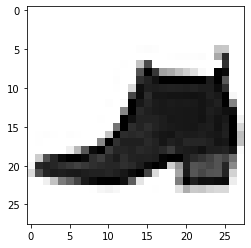

In [114]:
show(9201)